LOGISTIC REGRESSION :

Here, we try to implement the logistic regression model first on our own.

We first import the dataset we're using (Breast Cancer Diagnosis)

In [1]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math

data = datasets.load_breast_cancer()
print(data.keys())
print(data['feature_names'])
print(data['target_names'])

X = data['data']
y = data['target']
noOfFeatures = X.shape[1]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


From this, we see the available features in the dataset. Taking these features and applying feature scaling to them.

In [2]:
print("Number of features :", noOfFeatures)
print("Shape of X :", X.shape)
print("Shape of y :", y.shape)

maxValues = [X[:,i].max() for i in range(noOfFeatures)]
for i in range(noOfFeatures):
    X[:,i] = X[:,i] / maxValues[i]

X_train, X_test, y_train, y_test = train_test_split(X, y)
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Number of features : 30
Shape of X : (569, 30)
Shape of y : (569,)
Shape of X_train : (426, 30)
Shape of X_test : (143, 30)
Shape of y_train : (426,)
Shape of y_test : (143,)


First, we create an nd array for the weights of each feature and set the learning rate.

In [3]:
w = np.array([0.0 for i in range(noOfFeatures)])

print("The set of weights initially :", w)
print("The shape of w :", w.shape)

b = 0.0
alpha = 0.01

m = X_train.shape[0]
print("The number of training examples :", m)
print("The learning rate is set to :", alpha)
print("The initial value of b is :", b)

The set of weights initially : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
The shape of w : (30,)
The number of training examples : 426
The learning rate is set to : 0.01
The initial value of b is : 0.0


The function for this model is :
    
$ f(x) = g(w.x + b) = \frac{1}{1 + e^{-(w.x+b)}} $

    z = w.x + b

The cost function is given by : 

$
J_{w, b} = \frac{1}{m}\sum\limits_{i=1}^{m}-y^{(i)}log(f_{w, b}(x^{(i)})) - (1 - y^{(i)})log(1 - f_{w, b}(x^{(i)}))
$

On applying this cost function to the gradient descent algorithm, we get the update formulae for $w_{j}$ and b as follows :

$
w_{j} = w_{j} - \alpha * \frac{1}{m}\sum\limits_{i=1}^{m}(f_{w, b}(x^{(i)}) - y^{(i)})x_{j}^{(i)}
$

$
b = b - \alpha * \frac{1}{m}\sum\limits_{i=1}^{m}(f_{w, b}(x^{(i)}) - y^{(i)})
$

In [4]:
J = []

noOfIterations = 50000

for iteration in range(noOfIterations):

    z = np.dot(X_train, w) + b
    z *= -1
    ez = np.power(math.e, z)
    f = 1 / (1+ez)

    cost = ((-1*y_train*np.log(f)) - ((1 - y_train)*np.log(1 - f))).mean()
    J.append(cost)

    # Calculating loss for each individual feature
    currentDifference = np.subtract(f, y_train)
    for i in range(noOfFeatures):
        loss = (np.multiply(currentDifference, X_train[:, i])).mean()
        w[i] = w[i] - (alpha*loss)
    
    # Calculating b separately
    loss = (currentDifference).mean()
    b = b - (alpha*loss)

Now, plotting J against the number of iterations after gradient descent has been executed above.

The set of weights is now : [-0.61899135 -1.01292005 -0.78338787 -2.14130081  1.18728043 -0.87715647
 -2.64300706 -4.09806367  1.31299     3.62881535 -1.90273828  0.19386438
 -1.4877095  -1.48121059  0.36595596  0.97517941  0.88240867  0.33390426
  0.94719163  1.10887503 -1.77443003 -1.90269824 -1.72113281 -2.67554249
 -0.06963241 -1.52906265 -1.96084348 -4.14358773 -0.37730285  0.83785137]
b is now : 5.339095004072882


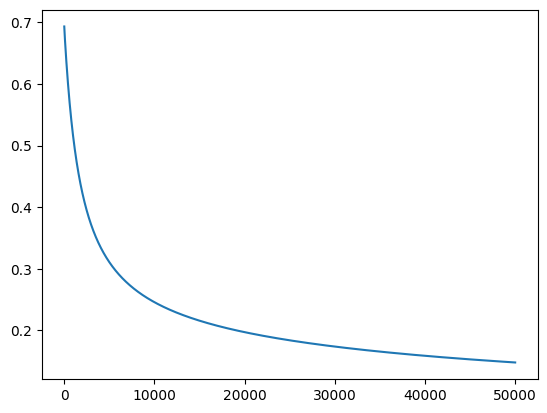

Initial Cost : 0.6931471805599453
Final Cost : 0.14795546085529127


In [5]:
print("The set of weights is now :", w)
print("b is now :", b)

iterations = [i for i in range(1, noOfIterations+1)]

plt.plot(iterations, J)
plt.show()

print("Initial Cost :", J[0])
print("Final Cost :", J[-1])

Calculating the error in our model using a confusion matrix :

In [6]:
z = np.dot(X_test, w) + b
z *= -1
ez = np.power(math.e, z)
modelPredictions = 1 / (1+ez)
modelPredictions[modelPredictions < 0.5] = 0

# print(modelPredictions)
print("Model Predictions : ")
print(modelPredictions)
print("\n y_test :")
print(y_test)

cm = confusion_matrix(y_test, modelPredictions)
print("True positives :", cm[0][0])
print("False positives :", cm[0][1])
print("False negatives :", cm[1][0])
print("True negatives :", cm[1][1])

Model Predictions : 
[0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]

 y_test :
[0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1]
True positives : 38
False positives : 3
False negatives : 0
True negatives : 102
